In [1]:
import numpy as np
import pandas as pd


In [95]:
target = pd.read_excel("dataset/target.xlsx", index_col=0)
features = pd.read_excel("dataset/features.xlsx",index_col=0)

In [64]:
from xgboost import XGBRFRegressor, XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor, AdaBoostRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict, cross_validate
from gplearn.genetic import SymbolicRegressor, SymbolicTransformer


In [4]:
features = features.dropna()

In [5]:
target= target.loc[features.index]

In [96]:
X = features.copy()
y = target['numeric_rating']

In [101]:
from sklearn.feature_selection import SequentialFeatureSelector

In [108]:
X = X.replace(np.nan, 0)

In [109]:
model = SequentialFeatureSelector(ExtraTreesRegressor(), cv=KFold(5))

In [110]:
model.fit(X, y)

SequentialFeatureSelector(cv=KFold(n_splits=5, random_state=None, shuffle=False),
                          estimator=ExtraTreesRegressor())

In [117]:
model.feature_names_in_[model.get_support()]

array(['BS_ST_BORROW', 'BS_TOT_ASSET', 'EBITDA_TO_INTEREST_EXPN',
       'FCF_TO_TOTAL_DEBT', 'RETAINED_CASH_FLOW_TO_NET_DEBT',
       'RETURN_ON_ASSET', 'SALES_GROWTH', 'SALES_REV_TURN',
       'TOTAL_EQUITY', 'TOT_DEBT_TO_EBITDA', 'TOT_DEBT_TO_TOT_ASSET',
       'TOT_DEBT_TO_TOT_CAP', 'TOT_DEBT_TO_TOT_EQY'], dtype=object)

In [46]:
model_metrics = [
    "oper_margin", 
    "tot_debt_to_tot_eqy", 
    "tot_debt_to_ebitda", 
    "ebitda_to_tot_int_exp", 
    "return_on_asset",
    "asset_turnover",

cl = [col.upper() for col in model_metrics]

In [49]:
X = X[cl]

In [90]:
X = X.replace(float("NaN"), 0)

In [91]:
cross_val = cross_validate(best, X, y, cv=KFold(5), n_jobs=-1)

In [92]:
cross_val

{'fit_time': array([0.41734433, 0.38363409, 0.41404915, 0.42063141, 0.42249537]),
 'score_time': array([0.08312249, 0.09026384, 0.0779953 , 0.06751657, 0.07823515]),
 'test_score': array([-0.06275658, -0.21952444,  0.01046377, -2.437     ,  0.21602295])}

from pycaret.regression import *

In [71]:
model = setup(X, target=y)

,Description,Value
0,Session id,3915
1,Target,numeric_rating
2,Target type,Regression
3,Original data shape,"(70, 27)"
4,Transformed data shape,"(70, 27)"
5,Transformed train set shape,"(49, 27)"
6,Transformed test set shape,"(21, 27)"
7,Numeric features,26
8,Rows with missing values,30.0%
9,Preprocess,True


C:\Users\103763\AppData\Local\anaconda3\Lib\site-packages\pycaret\internal\metrics.py:51: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(


In [72]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.3573,0.3327,0.5001,0.3062,0.0711,0.0609,0.1250
catboost,CatBoost Regressor,0.4528,0.4802,0.6123,0.0692,0.0867,0.0774,2.3890
rf,Random Forest Regressor,0.4726,0.4864,0.6256,0.0315,0.0884,0.0803,0.1490
omp,Orthogonal Matching Pursuit,0.4554,0.4219,0.5899,-0.0584,0.0848,0.0771,0.0360
knn,K Neighbors Regressor,0.4920,0.5260,0.6423,-0.0655,0.0913,0.0847,0.0810
ada,AdaBoost Regressor,0.4625,0.4866,0.6153,-0.0853,0.0877,0.0795,0.0900
dummy,Dummy Regressor,0.5277,0.5180,0.6419,-0.0931,0.0914,0.0902,0.0340
lightgbm,Light Gradient Boosting Machine,0.5354,0.4765,0.6379,-0.1399,0.0910,0.0900,0.1570
xgboost,Extreme Gradient Boosting,0.5040,0.6571,0.7105,-0.2033,0.1003,0.0874,0.0780
gbr,Gradient Boosting Regressor,0.5405,0.6193,0.7127,-0.2574,0.1002,0.0906,0.0890


C:\Users\103763\AppData\Local\anaconda3\Lib\site-packages\pycaret\internal\pycaret_experiment\supervised_experiment.py:339: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  .applymap(highlight_cols, subset=["TT (Sec)"])


In [73]:
best = tune_model(best)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.7172,0.9672,0.9835,0.0700,0.1458,0.1315
1,0.6346,0.5510,0.7423,0.0161,0.1135,0.1192
2,0.2156,0.0799,0.2826,0.5007,0.0411,0.0364
3,0.1663,0.0477,0.2184,0.0000,0.0298,0.0256
4,0.3177,0.2406,0.4905,-0.0025,0.0698,0.0553
5,0.3046,0.1661,0.4076,-0.0384,0.0572,0.0476
6,0.1937,0.0652,0.2553,0.0000,0.0349,0.0298
7,0.6920,0.9379,0.9684,0.2184,0.1193,0.0987
8,0.4552,0.3743,0.6118,0.6101,0.0887,0.0778


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


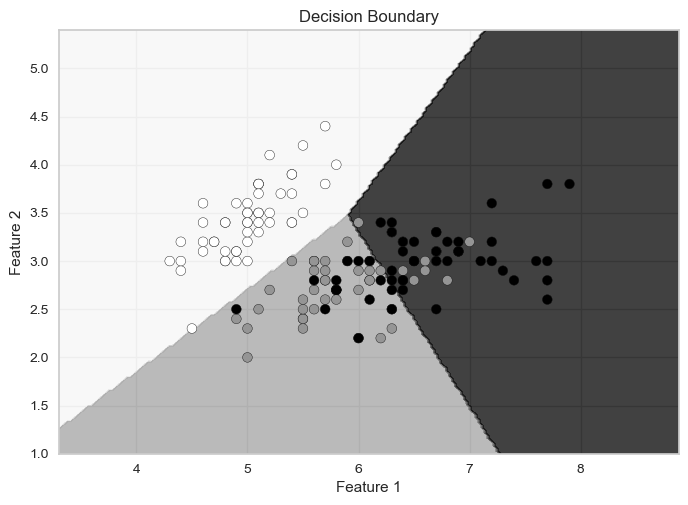

In [93]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LogisticRegression

# Load a dataset (for example, the Iris dataset)
iris = datasets.load_iris()
X = iris.data[:, :2]  # Use only two features for simplicity
y = iris.target

# Train a classifier
model = LogisticRegression()
model.fit(X, y)

# Create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict class for each point in the mesh
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary')
plt.show()


In [94]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [118]:
import pandas as pd

def generate_asset_allocation_table(fund_asset_allocation, tactical_asset_allocation):
    # Create a DataFrame
    df = pd.DataFrame({
        "Asset Class": list(tactical_asset_allocation.keys()),
        "Fund Asset Allocation": [fund_asset_allocation.get(k, 0) for k in tactical_asset_allocation.keys()],
        "Tactical Asset Allocation": list(tactical_asset_allocation.values())
    })

    # Calculate the difference
    df["Difference"] = df["Fund Asset Allocation"] - df["Tactical Asset Allocation"]

    # Reorder the columns
    df = df[["Asset Class", "Fund Asset Allocation", "Tactical Asset Allocation", "Difference"]]

    # Helper function to calculate total exposure
    def calculate_total_exposure(asset_classes, allocation_column):
        return df.loc[df["Asset Class"].isin(asset_classes), allocation_column].sum()

    # Insert the totals
    local_asset_classes = ["Local Equity", "Local Bonds", "Local Cash"]
    global_asset_classes = ["Foreign Equity", "Foreign Bonds", "Commodities", "Foreign Cash"]

    local_total_fund = calculate_total_exposure(local_asset_classes, "Fund Asset Allocation")
    local_total_tactical = calculate_total_exposure(local_asset_classes, "Tactical Asset Allocation")

    global_total_fund = calculate_total_exposure(global_asset_classes, "Fund Asset Allocation")
    global_total_tactical = calculate_total_exposure(global_asset_classes, "Tactical Asset Allocation")

    df.loc[len(df)] = ["Total Local", local_total_fund, local_total_tactical, local_total_fund - local_total_tactical]
    df.loc[len(df)] = ["Total Global", global_total_fund, global_total_tactical, global_total_fund - global_total_tactical]

    # Reset the index
    df = df.reset_index(drop=True)

    return df

# Example usage
fund_asset_allocation = {
    "Local Equity": 28.084583,
    "Local Bonds": 27.114364,
    "Local Cash": 5.790193,
    "Foreign Equity": 28.889471,
    "Foreign Bonds": 9.576332,
    "Commodities": 0.545057
}

tactical_asset_allocation = {
    "Local Equity": 26.084583,
    "Local Bonds": 27.114364,
    "Local Cash": 49.790193,
    "Commodities": 10.0,
    "Foreign Equity": 28.889471,
    "Foreign Bonds": 9.576332,
    "Foreign Cash": 0.545057
}

asset_allocation_table = generate_asset_allocation_table(fund_asset_allocation, tactical_asset_allocation)
print(asset_allocation_table.to_markdown(index=False))

| Asset Class    |   Fund Asset Allocation |   Tactical Asset Allocation |   Difference |
|:---------------|------------------------:|----------------------------:|-------------:|
| Local Equity   |               28.0846   |                   26.0846   |     2        |
| Local Bonds    |               27.1144   |                   27.1144   |     0        |
| Local Cash     |                5.79019  |                   49.7902   |   -44        |
| Commodities    |                0.545057 |                   10        |    -9.45494  |
| Foreign Equity |               28.8895   |                   28.8895   |     0        |
| Foreign Bonds  |                9.57633  |                    9.57633  |     0        |
| Foreign Cash   |                0        |                    0.545057 |    -0.545057 |
| Total Local    |               60.9891   |                  102.989    |   -42        |
| Total Global   |               39.0109   |                   49.0109   |   -10        |


In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Load the data
data = pd.read_csv('company_financial_data.csv')

# Define the features (financial metrics)
features = ['interest_coverage_ratio', 'debt_to_equity_ratio', 'current_ratio']

# Scale the features
scaler = MinMaxScaler()
data[features] = scaler.fit_transform(data[features])

# Define the scale values for each feature
scale_values = {
    'interest_coverage_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
    'debt_to_equity_ratio': [9.0, 8.0, 7.0, 6.0, 5.0, 4.0, 3.0, 2.0, 1.0],
    'current_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
}

# Bin the features based on the scale values
for feature in features:
    data[feature] = pd.cut(data[feature], bins=scale_values[feature], labels=range(1, 10), include_lowest=True)

# Define the target variable (credit score)
target = 'credit_score'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data[features], data[target], test_size=0.2, random_state=42)

# Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
accuracy = model.score(X_test, y_test)
print(f'Accuracy: {accuracy:.2f}')

# Make predictions
new_data = pd.DataFrame({'interest_coverage_ratio': [0.6], 'debt_to_equity_ratio': [2.5], 'current_ratio': [0.8]})
new_data[features] = scaler.transform(new_data[features])
for feature in features:
    new_data[feature] = pd.cut(new_data[feature], bins=scale_values[feature], labels=range(1, 10), include_lowest=True)

credit_score = model.predict(new_data[features])
print(f'Credit Score: {credit_score[0]}')